In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


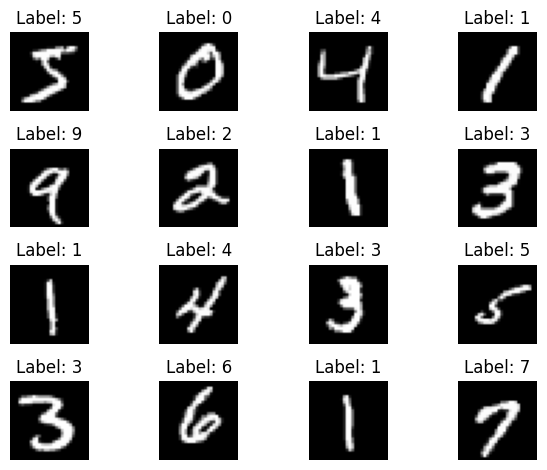

In [11]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
X_train = X_train/255
X_test = X_test/255

In [12]:
model=Sequential()

In [13]:
model.add(Flatten(input_shape=(28,28)))
model.add(
    Dense(units = 128 , activation = 'relu' )
)
model.add(
    Dense(units = 64 , activation = 'relu' )
)
model.add(
    Dense(units = 10 , activation = 'softmax' )
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(
    optimizer='adam',

    loss='sparse_categorical_crossentropy',

    metrics=['accuracy']
)

In [16]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 10s 3ms/step - loss: 0.2722 - accuracy: 0.9200 - val_loss: 0.1379 - val_accuracy: 0.9601
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1139 - accuracy: 0.9664 - val_loss: 0.1150 - val_accuracy: 0.9622
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 0.1011 - val_accuracy: 0.9713
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.1142 - val_accuracy: 0.9682
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0919 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0990 - val_accuracy: 0.9737
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.1046 - val_accuracy

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9781


[0.10092869400978088, 0.9781000018119812]

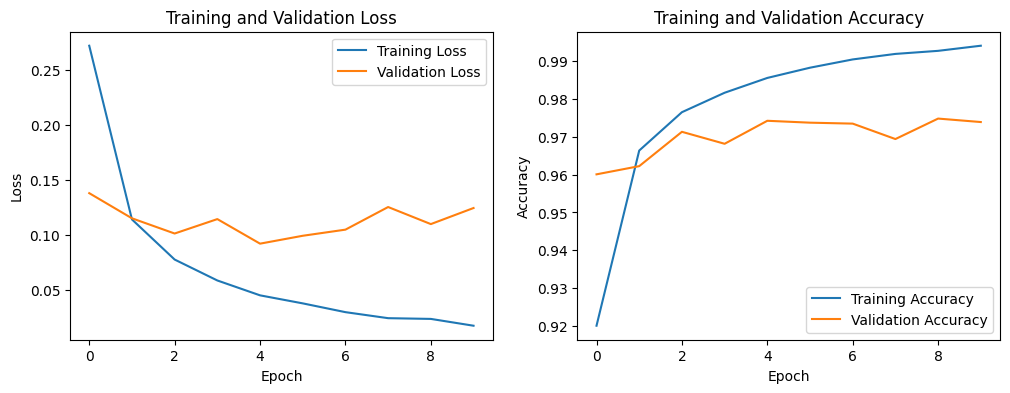

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [19]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_pred_labels=np.argmax(y_pred,axis=1)

In [23]:
y_pred_labels

array([7, 2, 1, ..., 4, 5, 6])

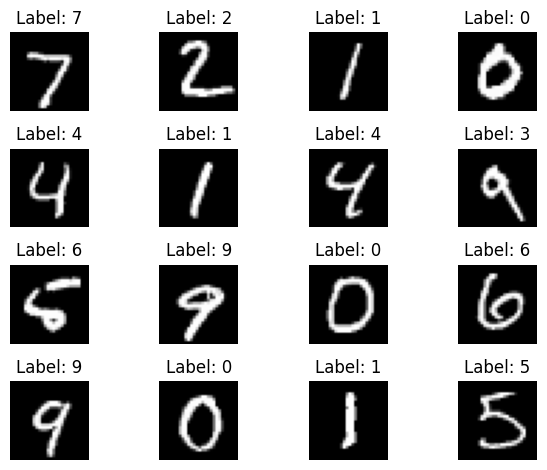

In [25]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_pred_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()